In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,KFold
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score,recall_score,precision_score,f1_score

In [58]:
df=pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/datasets/master/course_lead_scoring.csv')
df.head()

,lead_source,industry,number_of_courses_viewed,annual_income,employment_status,location,interaction_count,lead_score,converted
0,paid_ads,NaN,1,79450.0,unemployed,south_america,4,0.94,1
1,social_media,retail,1,46992.0,employed,south_america,1,0.80,0
2,events,healthcare,5,78796.0,unemployed,australia,3,0.69,1
3,paid_ads,retail,2,83843.0,NaN,australia,1,0.87,0
4,referral,education,3,85012.0,self_employed,europe,3,0.62,1


# Data preparation

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   lead_source               1334 non-null   object 
 1   industry                  1328 non-null   object 
 2   number_of_courses_viewed  1462 non-null   int64  
 3   annual_income             1281 non-null   float64
 4   employment_status         1362 non-null   object 
 5   location                  1399 non-null   object 
 6   interaction_count         1462 non-null   int64  
 7   lead_score                1462 non-null   float64
 8   converted                 1462 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 102.9+ KB


In [60]:
df.isna().sum()

lead_source                 128
industry                    134
number_of_courses_viewed      0
annual_income               181
employment_status           100
location                     63
interaction_count             0
lead_score                    0
converted                     0
dtype: int64

In [61]:
df[['lead_source','industry','employment_status','location']]=df[['lead_source','industry','employment_status','location']].fillna('NA')

In [62]:
df['annual_income']=df['annual_income'].fillna(0.0)

In [63]:
full_df,test_df=train_test_split(df,test_size=0.2,random_state=1)
train_df,val_df=train_test_split(full_df,test_size=0.25,random_state=1)

In [64]:
y_train=train_df['converted']
y_test=test_df['converted']
y_val=val_df['converted']

del train_df['converted']
del test_df['converted']
del val_df['converted']

In [65]:
encoder=DictVectorizer(sparse=False)
encoded_data=encoder.fit_transform(train_df.to_dict(orient='records'))

In [66]:
train_df=pd.DataFrame(encoded_data,columns=encoder.get_feature_names_out())
train_df.head()

,annual_income,employment_status=NA,employment_status=employed,employment_status=self_employed,employment_status=student,employment_status=unemployed,industry=NA,industry=education,industry=finance,industry=healthcare,...,lead_source=social_media,location=NA,location=africa,location=asia,location=australia,location=europe,location=middle_east,location=north_america,location=south_america,number_of_courses_viewed
0,95543.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0
1,54924.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,77352.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0
3,34600.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0
4,43615.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [67]:
encoded_data=encoder.transform(val_df.to_dict(orient='records'))
val_df=pd.DataFrame(encoded_data,columns=encoder.get_feature_names_out())
val_df.head()

,annual_income,employment_status=NA,employment_status=employed,employment_status=self_employed,employment_status=student,employment_status=unemployed,industry=NA,industry=education,industry=finance,industry=healthcare,...,lead_source=social_media,location=NA,location=africa,location=asia,location=australia,location=europe,location=middle_east,location=north_america,location=south_america,number_of_courses_viewed
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,58777.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0
2,78148.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0
3,63854.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
4,69099.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [68]:
encoded_data=encoder.transform(test_df.to_dict(orient='records'))
test_df=pd.DataFrame(encoded_data,columns=encoder.get_feature_names_out())
test_df.head()

,annual_income,employment_status=NA,employment_status=employed,employment_status=self_employed,employment_status=student,employment_status=unemployed,industry=NA,industry=education,industry=finance,industry=healthcare,...,lead_source=social_media,location=NA,location=africa,location=asia,location=australia,location=europe,location=middle_east,location=north_america,location=south_america,number_of_courses_viewed
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,47129.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,64775.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,46934.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0


# Question 1: ROC AUC feature importance

In [69]:
features_imp=[]
for col in ['number_of_courses_viewed','annual_income','interaction_count','lead_score']:
    auc=roc_auc_score(y_train,train_df[col])
    if(auc<0.5):
        train_df[col]=-train_df[col]
        test_df[col]=-test_df[col]
        val_df[col]=-val_df[col]
        auc*=-1

    features_imp.append((col,auc))

sorted(features_imp,key=lambda x:x[1],reverse=True)

[('number_of_courses_viewed', 0.7635680590007088),
 ('interaction_count', 0.738270176293409),
 ('lead_score', 0.6144993577250176),
 ('annual_income', 0.5519578313253012)]

# Question 2: Training the model

In [70]:
model=LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
model.fit(train_df,y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [71]:
round(roc_auc_score(y_val,model.predict_proba(val_df)[:,1]),3)

0.817

# Question 3: Precision and Recall

c:\Users\moham\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\moham\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


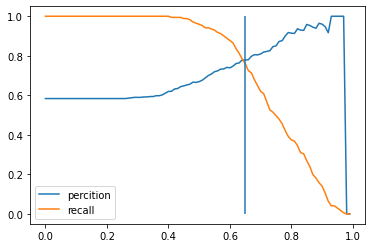

In [72]:
percition=[]
recall=[]
for t in np.arange(0.0,1.0,0.01):
    percition.append(precision_score(y_val,model.predict_proba(val_df)[:,1]>t))
    recall.append(recall_score(y_val,model.predict_proba(val_df)[:,1]>t))

plt.plot(np.arange(0.0,1.0,0.01),percition,label='percition')
plt.plot(np.arange(0.0,1.0,0.01),recall,label='recall')
plt.vlines(0.65,ymin=0,ymax=1)
plt.legend()
plt.show()

# Question 4: F1 score

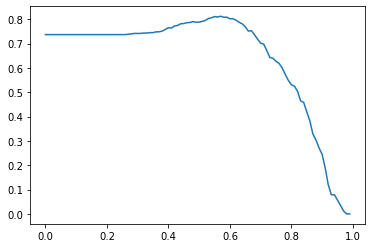

In [73]:
f_scores=[]
for t in np.arange(0.0,1.0,0.01):
    f_scores.append(f1_score(y_val,model.predict_proba(val_df)[:,1]>t))

plt.plot(np.arange(0.0,1.0,0.01),f_scores)

# Question 5: 5-Fold CV

In [91]:
full_df=pd.concat((train_df,val_df),axis=0).reset_index(drop=True)
y_full=pd.concat((y_train,y_val),axis=0).reset_index(drop=True)

In [92]:
y_full

0       0
1       1
2       0
3       0
4       0
       ..
1164    1
1165    1
1166    1
1167    0
1168    1
Name: converted, Length: 1169, dtype: int64

In [93]:
kfold=KFold(n_splits=5, shuffle=True, random_state=1)
model_temp=LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
auc=[]
for train_ind,val_ind in kfold.split(full_df):
    train_temp=full_df.iloc[train_ind]
    val_temp=full_df.iloc[val_ind]

    y_train_=y_full.iloc[train_ind]
    y_val_=y_full.iloc[val_ind]

    model_temp.fit(train_temp,y_train_)
    auc.append(roc_auc_score(y_val_,model_temp.predict_proba(val_temp)[:,1]))

np.std(auc)

0.018345934307496536

In [97]:
auc_mean_std=[]
for c in [0.000001, 0.001, 1]:
    auc=[]
    model_temp=LogisticRegression(solver='liblinear', C=c, max_iter=1000)
    for train_ind,val_ind in kfold.split(full_df):
        train_temp=full_df.iloc[train_ind]
        val_temp=full_df.iloc[val_ind]

        y_train_=y_full.iloc[train_ind]
        y_val_=y_full.iloc[val_ind]

        model_temp.fit(train_temp,y_train_)
        auc.append(roc_auc_score(y_val_,model_temp.predict_proba(val_temp)[:,1]))
    auc_mean_std.append((c,round(np.mean(auc),3),round(np.std(auc),3)))

sorted(auc_mean_std,key=lambda x:(x[1],x[2]),reverse=True)

[(0.001, 0.867, 0.015), (1, 0.822, 0.018), (1e-06, 0.561, 0.043)]